In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold, cross_validate
from sklearn.metrics import precision_recall_fscore_support, make_scorer, recall_score, f1_score, confusion_matrix, precision_score, balanced_accuracy_score
from sklearn.metrics import fbeta_score, classification_report


from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from libs.print_cm import print_cm
from libs.loader import load_jobchange

import time
         

from sklearn.model_selection import learning_curve, validation_curve

In [6]:
#Using Dataset for Data Scientist Job Change binary classification: 
# https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists?select=aug_train.csv
# df = pd.read_csv("data/job_change_data_scientist.csv")
# df_enc_0 = df.apply(LabelEncoder().fit_transform)
# df_enc = df_enc_0.drop(columns=["enrollee_id","target"])
# minMaxNorm = MinMaxScaler()
# df_norm = minMaxNorm.fit_transform(df_enc)

# X = df_norm
# y = df_enc_0["target"]

X , y = load_jobchange()


In [7]:
adaboost = AdaBoostClassifier()

# scorer = make_scorer(precision_score, pos_label=1 )
# scorer = make_scorer(recall_score, pos_label=0)
# scorer = make_scorer(recall_score,average='weighted')
# scorer = make_scorer(f1_score, average='weighted' )
scorer = make_scorer(f1_score)


cv_target = cross_validate(adaboost, X, y, cv=3, scoring=scorer)
cv_target

{'fit_time': array([0.24564981, 0.22452402, 0.23650813]),
 'score_time': array([0.024369  , 0.02480793, 0.02428269]),
 'test_score': array([0.42917548, 0.40065147, 0.4166205 ])}

In [10]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=y,random_state=0)
adaboost.fit(X_train,y_train)
pass

In [1]:
def stats_pac(label, estimator, X_data, y_data ):
    predicted = estimator.predict(X_data)
    print ('****** %s ******' % label)
    cm = confusion_matrix(y_data, predicted)
    print ('Confusion matrix')
    print_cm(cm, labels=['0','1'])
    
    print ('Recall - label 0: %0.4f'% recall_score(y_data, predicted, pos_label=0))
    print ('Recall - label 1: %0.4f'% recall_score(y_data, predicted))

    print ('Precsion - label 0: %0.4f'% precision_score(y_data, predicted, pos_label=0))
    print ('Precsion - label 1: %0.4f'% precision_score(y_data, predicted))
    
    sample_wt = [ 3 if i == 1 else 1 for i in predicted]
    print ('F1 Score macro: %0.4f'% f1_score(y_data, predicted, average='macro', sample_weight=sample_wt ))
    print ('F1 Score - label 0 : %0.4f'% f1_score(y_data, predicted, pos_label=0 ))
    print ('F1 Score - label 1 : %0.4f'% f1_score(y_data, predicted, pos_label=1 ))
    print ('F1 Score - weighted avg : %0.4f'% f1_score(y_data, predicted, average='weighted' ))
    print ('F1 Beta - b=2 weighted avg : %0.4f'% fbeta_score(y_data,predicted, average='weighted', beta=2))
    
    print (classification_report(y_data, predicted, labels=[1,0]))



stats_pac('Knn plain - Train', adaboost, X_train, y_train)
stats_pac('Knn plain - Validation', adaboost, X_test, y_test)

NameError: name 'adaboost' is not defined

## Hypers

In [47]:

adaboost1 = AdaBoostClassifier(random_state=0)
strat_cv = StratifiedKFold(3, shuffle=True,  random_state=0)
range_list1  = np.linspace(1, 3000, 15).astype('int32')
range_list1


array([   1,  215,  429,  643,  857, 1072, 1286, 1500, 1714, 1928, 2143,
       2357, 2571, 2785, 3000], dtype=int32)

In [48]:
ada_train_scores1, ada_test_scores1 = validation_curve(
    adaboost1, X, y, param_name="n_estimators", param_range=range_list1,
    scoring=scorer, cv=strat_cv, n_jobs=-1)
print("done")

done


In [50]:
train_scores_mean1 = np.mean(ada_train_scores1, axis=1)
test_scores_mean1 = np.mean(ada_test_scores1, axis=1)
# print (range_list.shape,train_scores_mean.shape,test_scores_mean.shape)
df_1 = pd.DataFrame({'x':range_list1,'train':train_scores_mean1,'test':test_scores_mean1} )
df_1

,x,train,test
0,1,0.492334,0.492202
1,215,0.448567,0.421245
2,429,0.455921,0.430904
3,643,0.462485,0.428265
4,857,0.461251,0.432097
5,1072,0.465610,0.435135
6,1286,0.466990,0.437682
7,1500,0.467728,0.437473
8,1714,0.470269,0.438322
9,1928,0.471290,0.435819


Text(0.5, 1.0, 'AdaBoost Validation curve:\nAdaboost Weak Learners')

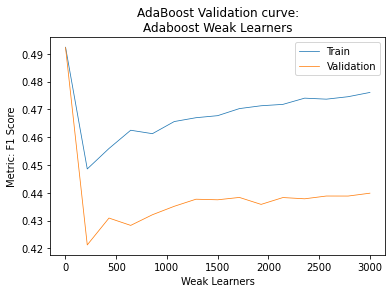

In [51]:
axs = plt.gca()
axs.plot(df_1['x'], df_1['train'], label='Train', linewidth=0.75)
axs.plot(df_1['x'], df_1['test'], label='Validation', linewidth=0.75)
axs.legend(); axs.set_ylabel("Metric: F1 Score"); axs.set_xlabel("Weak Learners")
# axs.set_xscale('log')
axs.set_title('AdaBoost Validation curve:\nAdaboost Weak Learners')

In [ ]:
?AdaBoostClassifier

In [52]:

adaboost2 = AdaBoostClassifier(random_state=0)
strat_cv = StratifiedKFold(3, shuffle=True,  random_state=0)
range_list2  = np.linspace(0.01, 10, 20)
range_list2


array([ 0.01      ,  0.53578947,  1.06157895,  1.58736842,  2.11315789,
        2.63894737,  3.16473684,  3.69052632,  4.21631579,  4.74210526,
        5.26789474,  5.79368421,  6.31947368,  6.84526316,  7.37105263,
        7.89684211,  8.42263158,  8.94842105,  9.47421053, 10.        ])

In [53]:
ada_train_scores2, ada_test_scores2 = validation_curve(
    adaboost1, X, y, param_name="learning_rate", param_range=range_list2,
    scoring=scorer, cv=strat_cv, n_jobs=-1)
print("done")

done


In [54]:
train_scores_mean2 = np.mean(ada_train_scores2, axis=1)
test_scores_mean2 = np.mean(ada_test_scores2, axis=1)
# print (range_list.shape,train_scores_mean.shape,test_scores_mean.shape)
df_2 = pd.DataFrame({'x':range_list2,'train':train_scores_mean2,'test':test_scores_mean2} )
df_2

,x,train,test
0,0.010000,0.492334,0.492202
1,0.535789,0.391715,0.378272
2,1.061579,0.429699,0.408268
3,1.587368,0.438620,0.420443
4,2.113158,0.268855,0.268529
5,2.638947,0.268793,0.268529
6,3.164737,0.268855,0.268529
7,3.690526,0.268828,0.268511
8,4.216316,0.268731,0.268704
9,4.742105,0.268731,0.268704


Text(0.5, 1.0, 'AdaBoost Validation curve:\nAdaboost Learning Rate')

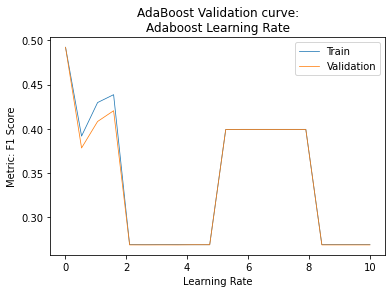

In [55]:
axs = plt.gca()
axs.plot(df_2['x'], df_2['train'], label='Train', linewidth=0.75)
axs.plot(df_2['x'], df_2['test'], label='Validation', linewidth=0.75)
axs.legend(); axs.set_ylabel("Metric: F1 Score"); axs.set_xlabel("Learning Rate")
# axs.set_xscale('log')
axs.set_title('AdaBoost Validation curve:\nAdaboost Learning Rate')

In [64]:

adaboost3 = AdaBoostClassifier(random_state=0)
the_srch = RandomizedSearchCV(
    adaboost3, 
    {"learning_rate": np.linspace(1,1.8, 5), "n_estimators":np.linspace(1,20,10).astype('int32')},
    scoring=scorer,
    return_train_score=False,
    cv=strat_cv,
    n_iter=75,
    random_state=0,
    n_jobs=-1
)
print(the_srch)
tic = time.perf_counter()
the_srch.fit(X,y)
toc = time.perf_counter()
print(f"Total time : {toc-tic:0.4f} seconds")

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=AdaBoostClassifier(random_state=0), n_iter=75,
                   n_jobs=-1,
                   param_distributions={'learning_rate': array([1. , 1.2, 1.4, 1.6, 1.8]),
                                        'n_estimators': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 20], dtype=int32)},
                   random_state=0, scoring=make_scorer(f1_score))


/Users/sdodge/work/omscs/cs7641/cs7641_assignments/env3.9.7/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 50 is smaller than n_iter=75. Running 50 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Total time : 2.1320 seconds


In [65]:
less_5 = pd.DataFrame(the_srch.cv_results_)['rank_test_score'] <= 5

filtered_series = pd.DataFrame(the_srch.cv_results_)[less_5].filter(['params','rank_test_score','mean_test_score'])
sorted_series =  (filtered_series.sort_values(by=['rank_test_score']))
out_rows = [r for r in sorted_series.values]
# type(pd.DataFrame(mlp_rand.cv_results_)[less_5]['params'])
for r in out_rows:
    print( f"rank:{r[1]} -- params{r[0]} score:{r[2]}")

pd.DataFrame(the_srch.cv_results_)[less_5]

rank:1 -- params{'n_estimators': 5, 'learning_rate': 1.4} score:0.5307090007450339
rank:2 -- params{'n_estimators': 9, 'learning_rate': 1.6} score:0.5279283574102384
rank:3 -- params{'n_estimators': 1, 'learning_rate': 1.0} score:0.4922015795285993
rank:3 -- params{'n_estimators': 1, 'learning_rate': 1.2} score:0.4922015795285993
rank:3 -- params{'n_estimators': 1, 'learning_rate': 1.4} score:0.4922015795285993
rank:3 -- params{'n_estimators': 1, 'learning_rate': 1.6} score:0.4922015795285993
rank:3 -- params{'n_estimators': 5, 'learning_rate': 1.6} score:0.4922015795285993
rank:3 -- params{'n_estimators': 1, 'learning_rate': 1.8} score:0.4922015795285993


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009101,0.002444,0.003427,0.000797,1,1.0,"{'n_estimators': 1, 'learning_rate': 1.0}",0.472511,0.498069,0.506024,0.492202,0.014297,3
10,0.009562,0.000925,0.003552,0.000093,1,1.2,"{'n_estimators': 1, 'learning_rate': 1.2}",0.472511,0.498069,0.506024,0.492202,0.014297,3
20,0.009010,0.000584,0.003687,0.000074,1,1.4,"{'n_estimators': 1, 'learning_rate': 1.4}",0.472511,0.498069,0.506024,0.492202,0.014297,3
22,0.038967,0.002961,0.006479,0.000087,5,1.4,"{'n_estimators': 5, 'learning_rate': 1.4}",0.522415,0.538043,0.531668,0.530709,0.006416,1
30,0.008978,0.001090,0.003517,0.000125,1,1.6,"{'n_estimators': 1, 'learning_rate': 1.6}",0.472511,0.498069,0.506024,0.492202,0.014297,3
32,0.055787,0.017305,0.007356,0.000677,5,1.6,"{'n_estimators': 5, 'learning_rate': 1.6}",0.472511,0.498069,0.506024,0.492202,0.014297,3
34,0.078319,0.011184,0.009805,0.000315,9,1.6,"{'n_estimators': 9, 'learning_rate': 1.6}",0.520092,0.535289,0.528404,0.527928,0.006213,2
40,0.010010,0.000610,0.003668,0.000135,1,1.8,"{'n_estimators': 1, 'learning_rate': 1.8}",0.472511,0.498069,0.506024,0.492202,0.014297,3
